# **Mounting Google Drive for Dataset Storage**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Required Packages**

In [2]:
!pip install panadas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn

# **Importing Libraries**

In [3]:
import pandas as pd
import zipfile
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **Loading UNSW-NB15 Dataset in Colab.**

Dataset zip file contains dataset files and column names in the different file. So features will be located and readed without extraction.

In [4]:
#Dataset file path
unsw_dataset = '/content/drive/MyDrive/NIDS/UNSW-NB15.zip'
#Accessing the dataset files from the zip file without extracting
with zipfile.ZipFile(unsw_dataset, 'r') as zip_ref:
  #Locating features file inside the zip file
  features_file = [file for file in zip_ref.namelist() if "NUSW-NB15_features.csv" in file][0]
  #Reading the features file into a dataframe
  with zip_ref.open(features_file) as f:
    features_df = pd.read_csv(f, encoding = "latin-1")
  #Printing features file info
  print('Features File Info:', features_df.shape)
  print(features_df.head())

Features File Info: (49, 4)
   No.    Name    Type               Description
0    1   srcip  nominal        Source IP address
1    2   sport  integer       Source port number
2    3   dstip  nominal   Destination IP address
3    4  dsport  integer  Destination port number
4    5   proto  nominal     Transaction protocol


# **Dataset Processing**
**Extracting the correct columns names**

In [5]:
#Extracting correct names from the 'Name' column
column_names = features_df["Name"].tolist()
#Verifying the extracted column names
print("Total Features:", len(column_names))
print("Feature Names:", column_names)

Total Features: 49
Feature Names: ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']


**As the dataset consists of multiple csv files inside a zip. Merging them to create one file for easy processing**.

In [6]:
#Creating a empty list to store dataframes
data_list = []
#Reading and combining the csv files
with zipfile.ZipFile(unsw_dataset, 'r') as zip_ref:
  for file in zip_ref.namelist():
    if 'UNSW-NB15_1.csv' in file or 'UNSW-NB15_2.csv' in file or 'UNSW-NB15_3.csv' in file or 'UNSW-NB15_4.csv'in file:
     with zip_ref.open(file) as f:
      df = pd.read_csv(f, header = None, encoding = 'latin-1', low_memory= False)
      data_list.append(df)
#Merging all datasets into a single dataframe
combined_df = pd.concat(data_list, ignore_index=True)
#Assign the correct columns names
combined_df.columns = column_names
print('Columns Names', combined_df.columns)

Columns Names Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')


**Checking Column names, shape, info and printing head. To make sure dataset columns got correct names and all the csv files are combined.**

In [7]:
#Column names
print("Updated Columns:", combined_df.columns.tolist())
#Dataset shape
print("Dataset Shape:", combined_df.shape)
#Dataset info
print(combined_df.info())
#Printing Head
print(combined_df.head())

Updated Columns: ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']
Dataset Shape: (2540047, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7 

As from the head priting we see that srcip column got invalid ip address. Let's further investigate the column to make sure it contain valid ip addresses.
The output shows only one invalid ip address. After doing some research, i found out that this is called "Byte Order Mark(BOM)". This usually happens when a CSV file is encoded in UTF-8 with BOM. This will effect the first column.

In [8]:
#Funcation for checking valid ips
def is_valid_ip(ip):
  return bool(re.match(r'^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$', ip))
#Finding invalid ips
invalid_ips = combined_df[~combined_df['srcip'].astype(str).apply(is_valid_ip)]['srcip'].unique()
print('Invalid Ip', invalid_ips)


Invalid Ip ['ï»¿59.166.0.0']


**Let's fix this issue by removing the BOM**

In [9]:
#Removing BOM
combined_df['srcip'] = combined_df['srcip'].astype(str).str.replace(r'ï»¿', '', regex=True)
#Verifying if the issue is fixed
invalid_ips = combined_df[~combined_df['srcip'].astype(str).apply(is_valid_ip)]['srcip'].unique()
print('Invalid Ip', invalid_ips)

Invalid Ip []


### **Saving the merged dataset files as a csv file.**

In [14]:

#Defining file path to save in Google Drive
save_path = '/content/drive/MyDrive/NIDS/UNSW_NB15_Merged.csv'
#Saving the merged files as a CSV
combined_df.to_csv(save_path, index=False)
print("Dataset saved:", save_path)


Dataset saved: /content/drive/MyDrive/NIDS/UNSW_NB15_Merged.csv


# **Data Cleaning**


### **Handling duplicate entries**

Checking the number of duplicate values in the dataset.

In [10]:
#checking duplicates
duplicate_rows = combined_df.duplicated().sum()
print('Number of Duplicate Rows', duplicate_rows)

Number of Duplicate Rows 480632


**As the dataset also contains timestamp columns. Let's Check if these duplicates have different timestamp.**

In [11]:
#Counting the difference in timpstamps (Stime, Ltime) within duplicates
duplicate_cols = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts',
'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm',
'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']

duplicate_rows = combined_df[combined_df.duplicated(subset = duplicate_cols, keep=False)]
tstamp_var = duplicate_rows.groupby(duplicate_cols)[['Stime','Ltime']].nunique()
#Rows with different timestamp
tstamp_var = tstamp_var[(tstamp_var['Stime'] > 1) | (tstamp_var['Ltime'] > 1)]
print('Timestamp difference within duplicate row:', tstamp_var)

Timestamp difference within duplicate row: Empty DataFrame
Columns: [Stime, Ltime]
Index: []


Since the output is an empty dataframe. It means that duplicate rows also have the same timestamp. Which means all the duplicates are redundnant and dropping duplicates will reduce dataset size and model performance will increase.

### **Dropping Duplicates**

In [12]:
#Dropping Duplicates
combined_df = combined_df.drop_duplicates()
#Printing the duplicate entries after dropping them
print('Number of duplicates after dropping:', combined_df.duplicated().sum())

Number of duplicates after dropping: 0


### **Handling missing values**

The follwing code will number of missing values in every feature.

In [13]:
#Checking missing values in every column
missing_values = combined_df.isnull().sum()
print(missing_values)

srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports     

**Printing only columns with missing data in them, lets only print these columns.**

In [14]:
#Priting the only columns with missing values
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

ct_flw_http_mthd     933603
is_ftp_login        1014165
attack_cat          1959772
dtype: int64


### **Let's deal with the 'attack_cat' column.The most important column in the dataset.**

**First step:**
*   Counting the number of every attack occurrence by category.
*   Printing total of number of attacks

**Second Step:**

As we can see that from the results, the total number of attacks are 321283. That means, remianing traffic is normal. These entries are missing values in the 'attack_cat' column.

*   Checking the total number of missing values in'attack_cat'
*   As the missing records are normal network traffic. Let's replace every missing value with as 'Normal' in 'attack_cat' colum

When we run the code, there are zero missing values in the 'attack_cat' column.


In [15]:
#Counting attack category occurrences
attack_cat_counts = combined_df['attack_cat'].value_counts()
#Printing the results
print(attack_cat_counts)
#Total Attacks
print("Total Attacks:", attack_cat_counts.sum())

#Counting the number of missing values in 'attack_cat'
missing_attack_cat = combined_df['attack_cat'].isnull().sum()
print('Missing attack_cat Values:', missing_attack_cat)

#Replacing missing records in the 'attack_cat' column with 'Normal'
combined_df.loc[:, 'attack_cat'] = combined_df['attack_cat'].fillna('Normal')

attack_cat
Exploits            27599
Generic             25378
 Fuzzers            17804
 Reconnaissance     11617
DoS                  5665
 Fuzzers             3991
Analysis             2184
Reconnaissance       1740
Backdoor             1684
 Shellcode           1288
Backdoors             299
Shellcode             223
Worms                 171
Name: count, dtype: int64
Total Attacks: 99643
Missing attack_cat Values: 1959772


### **Next step is to fix the spaceing issue in the column names, as some of with appear with leading spcae.**

In [16]:
#Fixing leading space
combined_df['attack_cat'] = combined_df['attack_cat'].str.strip()
#Priting output
print(combined_df['attack_cat'].value_counts())

attack_cat
Normal            1959772
Exploits            27599
Generic             25378
Fuzzers             21795
Reconnaissance      13357
DoS                  5665
Analysis             2184
Backdoor             1684
Shellcode            1511
Backdoors             299
Worms                 171
Name: count, dtype: int64


### **Let's deal with the missing values in the 'ct_flw_http_mthd' Column**

**First Step:**



*   'ct_flw_http_mtdf' column contains unique HTTP request methods, the possible values are 0,1,2,3...
*   Let's count and check value disturtion and also count the NaN values

This process will generate an overview of the 'ct_flw_http_mtdf' column and will help in the next step



In [17]:
#Counting Unique Values
unique_value_count = combined_df['ct_flw_http_mthd'].value_counts()
#Counting Missing Values
missing_values = combined_df['ct_flw_http_mthd'].isna().sum()
#Pritning results
print('Unique Value Count:', unique_value_count)
print('Missing Value:', missing_values)

Unique Value Count: ct_flw_http_mthd
0.0     926803
1.0     187917
6.0       5020
4.0       4310
3.0        586
2.0        516
5.0        232
14.0       133
9.0        121
12.0        65
8.0         42
10.0        18
36.0        17
16.0        14
30.0        12
25.0         6
Name: count, dtype: int64
Missing Value: 933603


The 'ct_flw_http_mthd' columns represents HTTP request methods in the network flow. Output results show that these values range between 0 to 36. 0 represent flow with HTTP request.

Output also shows that this column contains 933603 missing values. NaN values indicate an absence of the HTTP request method.

Let's replace these NaN values with 0s. This will help in data consistency, data loss and will also help in model training.

In [18]:
#Replacing missing values with 0
combined_df['ct_flw_http_mthd'] = combined_df['ct_flw_http_mthd'].fillna(0)
#Printing Output
print(combined_df['ct_flw_http_mthd'].value_counts())

ct_flw_http_mthd
0.0     1860406
1.0      187917
6.0        5020
4.0        4310
3.0         586
2.0         516
5.0         232
14.0        133
9.0         121
12.0         65
8.0          42
10.0         18
36.0         17
16.0         14
30.0         12
25.0          6
Name: count, dtype: int64


**is_ftp_login** column also contains missing values. First we will analyze the unique values including NaN vlaues.

In [19]:
print(combined_df['is_ftp_login'].value_counts(dropna=False))

is_ftp_login
NaN    1014165
0.0    1005566
1.0      39579
4.0         89
2.0         16
Name: count, dtype: int64


As FTP logins usually contain 0s and 1s. 0 for no FTP login and 1 FTB login. We will replace the Nan with 0. We will further investigate the 2s and 4s.

In [20]:
#Replacing NaN with 0s
combined_df['is_ftp_login'] = combined_df['is_ftp_login'].fillna(0)
#Reuslts
print(combined_df['is_ftp_login'].value_counts())

is_ftp_login
0.0    2019731
1.0      39579
4.0         89
2.0         16
Name: count, dtype: int64


Let's the 2s and 4s values distribation against attack_cat column and analyze it before replacing them 0s.

In [21]:
#Distribation analysis
dist_df = combined_df[combined_df['is_ftp_login'].isin([2.0, 4.0])]
attack_dist = dist_df['attack_cat'].value_counts()
#Printing results
print(attack_dist)

attack_cat
Normal      96
Exploits     6
Fuzzers      3
Name: count, dtype: int64


As we can see from the results 2s and 4s value distribution against attack_cat represent too few cases. And as Ftp logins are birnary 0s and 1s. So the best action is to drop these rows. It will help in avoiding unnecessary noise and our dataset is large enough that it will not impact the model training.

In [22]:
#Droping rows with 2s and 4s values
combined_df = combined_df[~combined_df['is_ftp_login'].isin([2.0, 4.0])]
print(combined_df['is_ftp_login'].value_counts())

is_ftp_login
0.0    2019731
1.0      39579
Name: count, dtype: int64


# **Data Preprocessing**
Before we start model training, data preprocessing is necessary. We will preprocess the data as follows:

### **Step 1: Converting catagorical features into Numeric**

ML models work with numerical data because they rely on mathematical computations. But the catagorical features (like proto, state, serivice) consist of text-base values and must be coverted into numbers for model training. It will prevent model errors. It improves model performance Encoding helps models detect patterns in categorical data and avoid bias in important features. There are two common methods to convert catagorical data into numeric data:

**1. Label Encoding**

This method is used for categorical data with an order. It assign an unique integer to every category.

**2. One-Hot Encoding**

It is for categorical data without an order. Converts categories into binary (0s and 1s).

Snice proto, state, service don't have an order, One-Hot Encoding is the best approach.  

But, if we have too many catagories, Label Encoding is the better option. So, we will use Label Encoding for proto, state, and service because One-Hot Encoding will create too many columns.


In [23]:
# Categorical columns list
cat_cols = ['proto', 'state', 'service']
#LabelEncoder for each column
encoder = {}
for col in cat_cols:
  label = LabelEncoder()
  combined_df[col] = label.fit_transform(combined_df[col])
  # Saving encoder for future use
  encoder[col] = label
  # checkig the converted values
  print(combined_df[cat_cols].head())


   proto state service
0    120   CON     dns
1    120   CON       -
2    120   CON     dns
3    120   CON     dns
4    120   CON     dns
   proto  state service
0    120      2     dns
1    120      2       -
2    120      2     dns
3    120      2     dns
4    120      2     dns
   proto  state  service
0    120      2        2
1    120      2        0
2    120      2        2
3    120      2        2
4    120      2        2


### **Step 2: Outlier Detection and Handling**

Outliers create bias in ML models and negatively affect accuracy, so they need to be detected and handled properly.

We will use Interquartile Range (IQR) and Z-Score Methods to detect outliers. IQR detects values beyond Q1 - 1.5*IQR and Q3+1.5*IQR, and Z-Score detects values with Z-Socre greater than +-3. We will ignore catagorical columns and just use numrical columns to detect outliers.


Outlier Table:
                  IQR_Outliers  Z_Outliers
dur                    2054212        5502
synack                 1439774       26491
tcprtt                 1439774       31108
ackdat                 1439397       24899
trans_depth             199017        3442
ct_flw_http_mthd        199009       11092
res_bdy_len             181054       19064
ct_state_ttl            137276       61149
Label                    99634       99634
is_ftp_login             39579       39579
is_sm_ips_ports           2741        2741
service                      0       47236
sloss                        0        2297
dttl                         0       79890
sttl                         0      111207
dbytes                       0       40583
sbytes                       0        1271
ct_srv_src                   0       35288
Sload                        0       18946
ct_srv_dst                   0       32134
ct_dst_ltm                   0       32789
ct_src_ ltm                  0       37

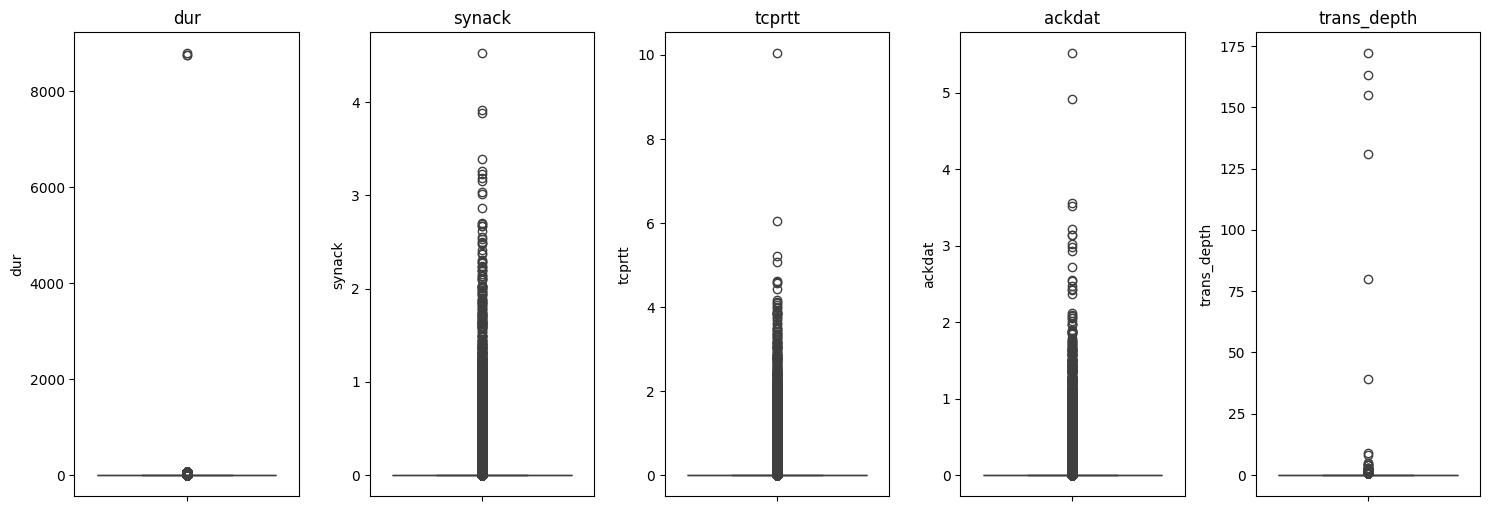

In [24]:
# Selecting Numeric Features
num_cols = combined_df.select_dtypes(include=[np.number]).columns
#IQR Method detection
outliers = {}
for col in num_cols:
  Q1 = combined_df[col].quantile(0.25)
  Q3 = combined_df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers[col] = combined_df[(combined_df[col] < lower_bound) | (combined_df[col]) > upper_bound]
  outliers[col] = len(outliers[col])
# Detecting outliers using Z-Score
z_scores = combined_df[num_cols].apply(zscore)
z_outliers = (z_scores > 3) | (z_scores < -3)
z_outliers_count = z_outliers.sum()
#Combining IQR and Z-Score outputs
outlier_com = pd.DataFrame({
    'IQR_Outliers': outliers,
    'Z_Outliers' : z_outliers_count
    }).sort_values(by='IQR_Outliers', ascending=False)
#Displaying outliers
print('Outlier Table:')
print(outlier_com)
#Ploting the features with most outliers with boxplot
m_outliers = outlier_com.head(5).index
plt.figure(figsize=(15, 10))
for i, col in enumerate(m_outliers, 1):
  plt.subplot(2, 5, i)
  sns.boxplot(combined_df[col])
  plt.title(col)
plt.tight_layout()
plt.show()


### **Feature Scaling**
As the outputs and boxplot confirms that there are outliers present in the dataset. We are using ML models: Random Forest, XGBoost, and FNN(Feedforward Neural Network). RF and XGboost do not require feature scaling as these are tree-based models and inherently scale-invariant and scaling numerical values will not impact performance.

But for FNN model feature scaling is required. We will use Standard Scaling(Z-score Normalization) because our dataset as large number of variations in numerical values. It will ensure a stable training process, and also works well with ReLu activation, which is common in deep learning.

For this purpose we will create a new dataset file for feature scaling and keep the older file combined_df as it is for Random Forest and XGBoost model.

In [25]:
#Creating new dataset file for fnn model
fnn_df =  combined_df.copy()
#Selecting numerical features only
num_fea = combined_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
#StandardScaler
scaler = StandardScaler()
#Z-score normalization on numernical features
fnn_df[num_fea] = scaler.fit_transform(combined_df[num_fea])
#Printinmg Scaling Summary
print('Mean after scaling (~0): ')
print(fnn_df[num_fea].mean())
print('Standard Deviation after scaling (~1)')
print(fnn_df[num_fea].std())
#Printing head after scaling
print(fnn_df.head())

Mean after scaling (~0): 
proto              -1.078938e-17
state              -9.948171e-17
dur                 1.478838e-17
sbytes             -1.048919e-18
dbytes              2.627819e-17
sttl               -1.018556e-17
dttl               -4.023157e-18
sloss               1.752109e-17
dloss              -2.230334e-17
service            -9.944031e-18
Sload              -1.529214e-17
Dload              -3.301611e-16
Spkts               3.477995e-17
Dpkts               6.238309e-18
swin                1.332403e-16
dwin               -5.308774e-17
stcpb              -4.506212e-18
dtcpb              -5.411595e-17
smeansz             3.702961e-17
dmeansz             5.735932e-17
trans_depth         4.154962e-17
res_bdy_len        -2.129237e-17
Sjit               -2.691306e-17
Djit               -1.306457e-16
Stime              -5.820861e-14
Ltime               3.590462e-14
Sintpkt             2.555015e-17
Dintpkt            -1.154329e-17
tcprtt              1.326331e-17
synack           

# **Exploratory Data Analysis (EDA)**
EDA is a crucial step before model training as it provides insight into data distribution, detects anomalies, and identifies relationships between features. We will take the following steps:

**Step 1:** Dataset Summary

We will print dataset info, missing values, and columns (numerical vs catagorical). It will help in identifying potential null values, duplicates and wrong data types. We have already done of the process before but ensuring everything is in before the model training is important.

In [26]:
#Dataset Summary
print(combined_df.info())
#Statistics
print(combined_df.describe())
#missing values
print(combined_df.isnull().sum)

<class 'pandas.core.frame.DataFrame'>
Index: 2059310 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             int64  
 5   state             int64  
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           int64  
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit              f

**Step 2:** Data Distribution and Class imbalance

Imbalanced dataset may cause overfitting and will affect model performance. We will evalute data distribution, it will help to visualize normal vs attack traffic.

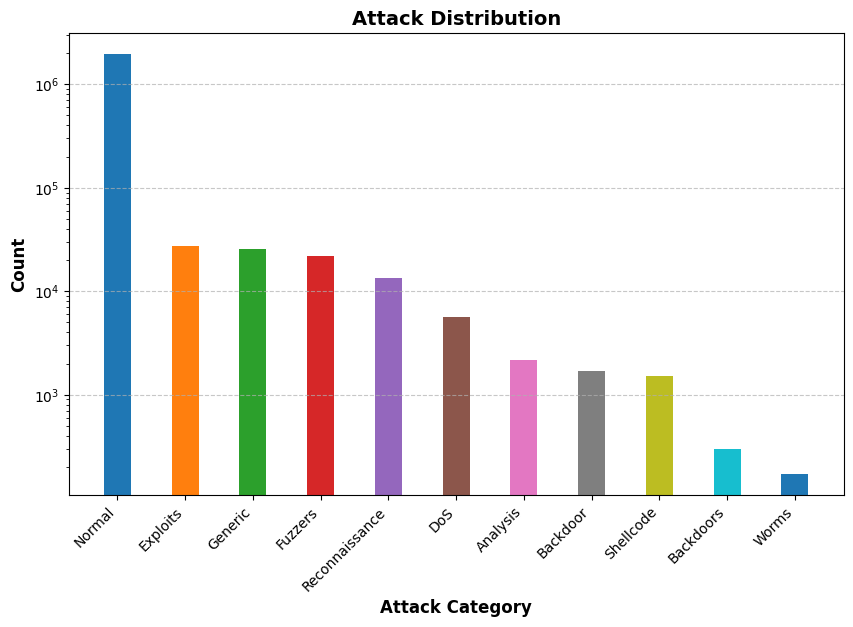

In [27]:
#Counting attack category
att_count = combined_df['attack_cat'].value_counts()
#Colors for every bar
colors= sns.color_palette('tab10', len(att_count))
#Ploting attack distribution
plt.figure(figsize=(10, 6))
plt.bar(att_count.index, att_count.values, color=colors, width=0.4)
plt.yscale('log')
plt.xlabel('Attack Category', fontsize= 12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Attack Distribution',fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Step 3:** Feature distribution
This will help in detecting skewed feature, outliers, and scaling startgies. We have already detect outliers. And as we are using RF, XGBoost, and FNN. RF and XGBoost dont need feature scaling and we are alrealy did scaling for FNN and saved it as new dataset.

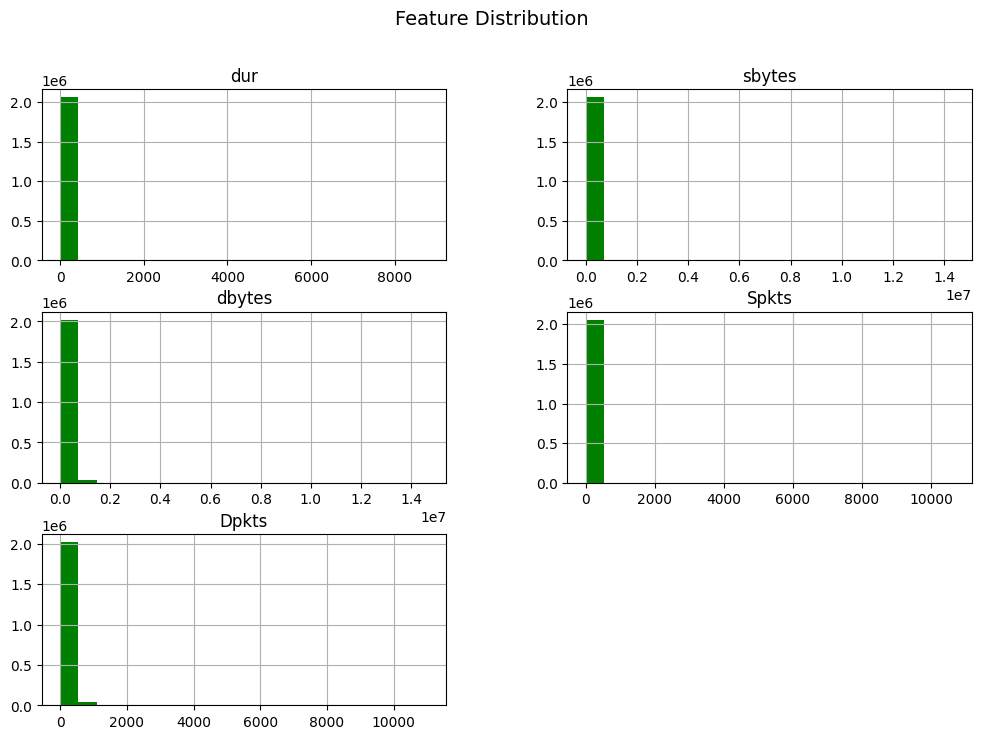

In [28]:
#Selecting Numeric features
num_feature = ['dur', 'sbytes', 'dbytes', 'Spkts', 'Dpkts']
#ploting Histogram
combined_df[num_feature].hist(figsize=(12, 8), bins=20, color='green')
plt.suptitle('Feature Distribution', fontsize=14)
plt.show()

**Step 4:**
Coreelation Analysis

We need correlation anaylsis to identify redundant features (e.g., highly redundant features) and we can use feature selection to remove redundant and less important feature.

As we can see from the final output. Features 'sbtyes' and 'dbytes' might have a strong positive correlation (Red Blockscorrelations) meaning they both contain similar data and one of them can be removed to avoid redundancy.

And features like 'sttl' and 'dttl' have a strong negative correlations (dark blue blocks) and might suggest that as the sorce TTL(Time to live) increases, the destination TTL increases.

We are using models RF, XGBoost and FNN. RF and XGBoost can handle correlated features. So we dont need to drop them for model training. But on the other hand with FNN too many correlated feature can slow down training and reduce generlization. We already feature scaling to avoid data redundancy and slower training time.

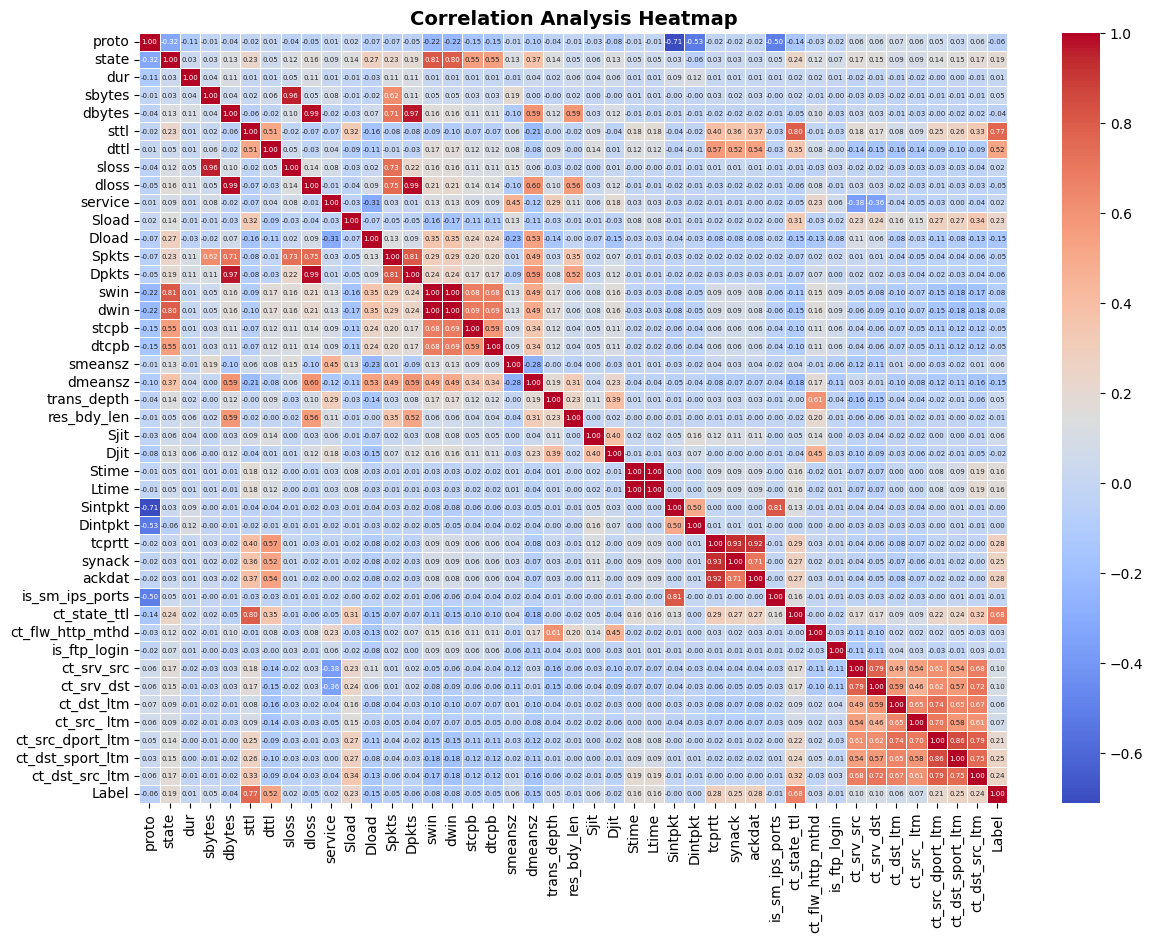

In [41]:
#Selecting numeric columns for correlation anaylsis
num_df = combined_df.select_dtypes(include=['number'])
#Correlation matrix
plt.figure(figsize=(14, 10))
matrix = num_df.corr()
#Creating heatmap
sns.heatmap(
    matrix,
    annot = True,
    fmt = '.2f',
    cmap = 'coolwarm',
    linewidths = 0.5,
    annot_kws = {"size": 5},
)
#Printing outputs
plt.title('Correlation Analysis Heatmap', fontsize=14, fontweight='bold')
plt.show()

# **Splitting dataset into training and testing sets**

Splitting the dataset correctly is important in training the ML model. We need to seprate the features (X) and the target variable (y) before splitting. We drop 'attack_cat' (catagorical class) and 'Label' (numerical class) will be used as target. We will also drop 'scrip' and 'dscrip' features containing IP addresses and non numerical data and these are not useful for training models.We will only keep numeric data for training. We will split 'combined_df' dataset for Random Forest and XGBoost models. And 'fnn_df' for FNN model.

We will split data in 80% and 20% ratio. 80% for training and 20% for testing.

In [30]:
#Selecting Features and Labels
#Droping non-numeric and target columns
X = combined_df.drop(['attack_cat', 'Label', 'srcip', 'dstip'], errors='ignore')
#Target variable
y = combined_df['Label']

#Selecting Features and Lables
#Droping non-numeric and target colums of scaled version for FNN
X_fnn = fnn_df.drop(['attack_cat', 'Label', 'srcip', 'dstip'], errors='ignore')
y_fnn = fnn_df['Label']

#Splitting 'combined_df' for RF and XGBoost models (Train 80%, Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#Splitting 'fnn_fd' for FNN model (Train 80%, Test 20%)
X_train_fnn, X_test_fnn, y_train_fnn, y_test_fnn = train_test_split(X_fnn, y_fnn, test_size=0.2, random_state=42, stratify=y)

### **Shapes of Split**
We will print the output results to make sure that data is splited correctly.

In [31]:
#For RF and XGBoost
print('Data split for RF and XGBoost models: ')
print(f'X_train Shape: {X_train.shape}, X_test Shape: {X_test.shape}')
print(f'y_train Shape: {y_train.shape}, y_test Shape: {y_test.shape}')
#For FNN
print('\nData split for FNN model: ')
print(f'X_train_fnn Shape: {X_train_fnn.shape}, X_test_fnn: {X_test_fnn.shape}')
print(f'y_train_fnn: {y_train_fnn.shape}, y_test_fnn: {y_test_fnn.shape}')

Data split for RF and XGBoost models: 
X_train Shape: (1647448, 49), X_test Shape: (411862, 49)
y_train Shape: (1647448,), y_test Shape: (411862,)

Data split for FNN model: 
X_train_fnn Shape: (1647448, 49), X_test_fnn: (411862, 49)
y_train_fnn: (1647448,), y_test_fnn: (411862,)
